In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('data.xlsx')
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,0-2,yes,2,left,right_up,no,recurrence-events


In [3]:
data.head(10)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,0-2,yes,2,left,right_up,no,recurrence-events
5,50-59,premeno,25-29,0-2,no,2,right,left_up,yes,no-recurrence-events
6,50-59,ge40,40-44,0-2,no,3,left,left_up,no,no-recurrence-events
7,40-49,premeno,15-19,0-2,no,2,left,left_up,no,no-recurrence-events
8,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
9,40-49,ge40,40-44,15-17,yes,2,right,left_up,yes,no-recurrence-events


In [4]:
data.shape

(286, 10)

In [5]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(285, 10)

In [8]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data['age_encoded']=encode.fit_transform(data['age'])
data['menopause_encoded']=encode.fit_transform(data['menopause'])
data['tumor_size_encoded']=encode.fit_transform(data['tumor-size'])
data['inv_nodes_encoded']=encode.fit_transform(data['inv-nodes'])
data['node_caps_encoded']=encode.fit_transform(data['node-caps'])
data['deg_malig_encoded']=encode.fit_transform(data['deg-malig'])
data['breast_encoded']=encode.fit_transform(data['breast'])
data['breast_quad_encoded']=encode.fit_transform(data['breast-quad'])
data['irradiat_encoded']=encode.fit_transform(data['irradiat'])
data['class_encoded']=encode.fit_transform(data['Class'])
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,age_encoded,menopause_encoded,tumor_size_encoded,inv_nodes_encoded,node_caps_encoded,deg_malig_encoded,breast_encoded,breast_quad_encoded,irradiat_encoded,class_encoded
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events,2,2,1,0,1,2,1,2,0,1
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events,3,0,1,0,0,0,1,0,0,0
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events,3,0,5,0,0,1,0,1,0,1
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events,2,2,5,0,1,2,1,1,1,0
4,40-49,premeno,30-34,0-2,yes,2,left,right_up,no,recurrence-events,2,2,4,0,1,1,0,4,0,1


In [9]:
data.drop(['age', 'menopause', 'tumor-size','node-caps', 'inv-nodes', 'deg-malig','breast','breast-quad', 'irradiat','Class'], axis=1, inplace=True)

In [10]:
data.head()

,age_encoded,menopause_encoded,tumor_size_encoded,inv_nodes_encoded,node_caps_encoded,deg_malig_encoded,breast_encoded,breast_quad_encoded,irradiat_encoded,class_encoded
0,2,2,1,0,1,2,1,2,0,1
1,3,0,1,0,0,0,1,0,0,0
2,3,0,5,0,0,1,0,1,0,1
3,2,2,5,0,1,2,1,1,1,0
4,2,2,4,0,1,1,0,4,0,1


In [11]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(data['age_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 0.5495949899303949


In [12]:
contingency_table=pd.crosstab(data['deg_malig_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 1.4957584577546706e-07


In [13]:
contingency_table=pd.crosstab(data['menopause_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 0.6973907778565795


In [14]:
contingency_table=pd.crosstab(data['tumor_size_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 0.17343229955045297


In [15]:
contingency_table=pd.crosstab(data['inv_nodes_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 0.0004944360298129765


In [16]:
contingency_table=pd.crosstab(data['node_caps_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 6.286703792847224e-06


In [17]:
contingency_table=pd.crosstab(data['breast_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 0.4111568805825421


In [18]:
contingency_table=pd.crosstab(data['breast_quad_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 0.4061062547893183


In [19]:
contingency_table=pd.crosstab(data['irradiat_encoded'], data['class_encoded'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print("p-value:", p_value)

p-value: 0.001906565907262372


irradiate
inv-nodes
node-caps
and deg-malig

In [20]:
data.drop(['age_encoded','tumor_size_encoded', 'breast_encoded', 'breast_quad_encoded','menopause_encoded'], axis=1, inplace=True)

In [21]:
data.head()

,inv_nodes_encoded,node_caps_encoded,deg_malig_encoded,irradiat_encoded,class_encoded
0,0,1,2,0,1
1,0,0,0,0,0
2,0,0,1,0,1
3,0,1,2,1,0
4,0,1,1,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

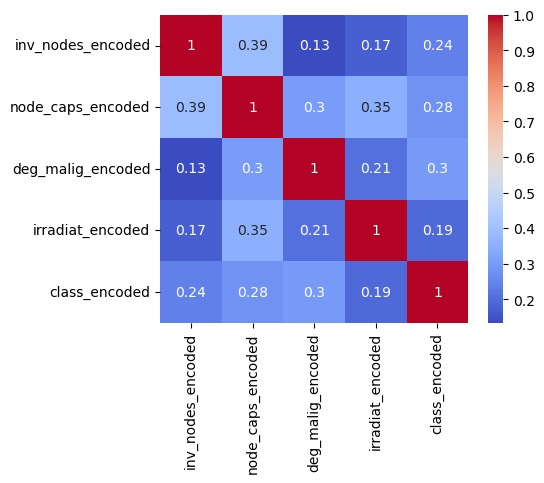

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix=data.corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=data.drop('class_encoded', axis=1)
Y=data['class_encoded']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1, random_state=42)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8620689655172413
